# Data Overview

This notebook provides basic exploratory data analysis and sanity checks for the fixed-income event modelling dataset.

**No statistical models or regressions** - just data inspection and visualization.

In [1]:
import sys
from pathlib import Path

# Add src to path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data.merge_panel import build_fed_panel
from src.utils.logging_utils import setup_logging

# Set up logging
setup_logging()

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


## Download FRED Data

## Download all required FRED series if they don't already exist.


In [3]:
from src.data.fred_loader import load_all_fred_data
from src.config import FRED_SERIES
import os

# Check if FRED API key is set
api_key = os.getenv("FRED_API_KEY")
if not api_key:
    print("WARNING: FRED_API_KEY not found in environment.")
    print("Please set it in a .env file or as an environment variable.")
    print("You can create a .env file by running: ./setup_env.sh")
    print("\nSkipping FRED data download.")
else:
    print(f"Downloading {len(FRED_SERIES)} FRED series...")
    print(f"Series: {', '.join(FRED_SERIES)}")
    try:
        load_all_fred_data(FRED_SERIES, api_key=api_key)
        print("✓ FRED data download complete!")
    except Exception as e:
        print(f"Error downloading FRED data: {e}")
        print("Make sure your FRED_API_KEY is valid.")


Series: DGS2, DGS10, UNRATE, CPIAUCSL, FEDFUNDS, GDPC1
2025-11-18 11:26:21 - src.data.fred_loader - INFO - Downloading 6 FRED series...
2025-11-18 11:26:21 - src.data.fred_loader - INFO - Downloading FRED series: DGS2
2025-11-18 11:26:25 - src.data.fred_loader - INFO - Saved DGS2 to /home/bitzaven/CodingProjects/ExamplesFixedIncomeModelling/data/raw/fred/DGS2.csv
2025-11-18 11:26:25 - src.data.fred_loader - INFO - Downloading FRED series: DGS10
2025-11-18 11:26:27 - src.data.fred_loader - INFO - Saved DGS10 to /home/bitzaven/CodingProjects/ExamplesFixedIncomeModelling/data/raw/fred/DGS10.csv
2025-11-18 11:26:27 - src.data.fred_loader - INFO - Downloading FRED series: UNRATE
2025-11-18 11:26:28 - src.data.fred_loader - INFO - Saved UNRATE to /home/bitzaven/CodingProjects/ExamplesFixedIncomeModelling/data/raw/fred/UNRATE.csv
2025-11-18 11:26:28 - src.data.fred_loader - INFO - Downloading FRED series: CPIAUCSL
2025-11-18 11:26:29 - src.data.fred_loader - INFO - Saved CPIAUCSL to /home/bit

## Load Fed Panel

In [4]:
# Load the Fed panel
df = build_fed_panel()

print(f"Panel shape: {df.shape}")
print(f"\nDate range: {df['date'].min()} to {df['date'].max()}")
print(f"\nColumns: {list(df.columns)}")


2025-11-18 11:26:34 - src.data.merge_panel - INFO - Building Fed panel...
2025-11-18 11:26:34 - src.data.merge_panel - INFO - Loading FRED data...
2025-11-18 11:26:34 - src.data.fred_loader - INFO - Merging 6 FRED series into daily panel...
2025-11-18 11:26:34 - src.data.fred_loader - INFO - Computed slope_10y_2y = y_10y - y_2y
2025-11-18 11:26:34 - src.data.fred_loader - INFO - Computed CPI YoY change
2025-11-18 11:26:34 - src.data.fred_loader - INFO - Merged panel shape: (28808, 9)
2025-11-18 11:26:34 - src.data.merge_panel - INFO - Loading FedWatch probability data...
2025-11-18 11:26:34 - src.data.fedwatch_loader - INFO - Found 0 FedWatch Excel files
2025-11-18 11:26:34 - src.data.fedwatch_loader - WARNING - No FedWatch files found
2025-11-18 11:26:34 - src.data.fedwatch_loader - WARNING - No FedWatch data available
2025-11-18 11:26:34 - src.data.merge_panel - INFO - Merging FRED and FedWatch data...
2025-11-18 11:26:34 - src.data.merge_panel - INFO - Fed panel built: 28808 rows, 1

## Basic Data Inspection

In [5]:
# Display first few rows
df.head(10)


,date,y_2y,y_10y,unemployment,cpi,fed_funds,gdp,slope_10y_2y,cpi_yoy,p_fed_outcome
0,1947-01-01,NaN,NaN,NaN,21.48,NaN,2182.681,NaN,NaN,None
1,1947-01-02,NaN,NaN,NaN,21.48,NaN,2182.681,NaN,NaN,None
2,1947-01-03,NaN,NaN,NaN,21.48,NaN,2182.681,NaN,NaN,None
3,1947-01-04,NaN,NaN,NaN,21.48,NaN,2182.681,NaN,NaN,None
4,1947-01-05,NaN,NaN,NaN,21.48,NaN,2182.681,NaN,NaN,None
5,1947-01-06,NaN,NaN,NaN,21.48,NaN,2182.681,NaN,NaN,None
6,1947-01-07,NaN,NaN,NaN,21.48,NaN,2182.681,NaN,NaN,None
7,1947-01-08,NaN,NaN,NaN,21.48,NaN,2182.681,NaN,NaN,None
8,1947-01-09,NaN,NaN,NaN,21.48,NaN,2182.681,NaN,NaN,None
9,1947-01-10,NaN,NaN,NaN,21.48,NaN,2182.681,NaN,NaN,None


In [6]:
# Data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28808 entries, 0 to 28807
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           28808 non-null  datetime64[ns]
 1   y_2y           18064 non-null  float64       
 2   y_10y          23328 non-null  float64       
 3   unemployment   28443 non-null  float64       
 4   cpi            28808 non-null  float64       
 5   fed_funds      26070 non-null  float64       
 6   gdp            28808 non-null  float64       
 7   slope_10y_2y   18064 non-null  float64       
 8   cpi_yoy        28443 non-null  float64       
 9   p_fed_outcome  0 non-null      object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 2.2+ MB


In [7]:
# Summary statistics
df.describe()


,date,y_2y,y_10y,unemployment,cpi,fed_funds,gdp,slope_10y_2y,cpi_yoy
count,28808,18064.000000,23328.000000,28443.000000,28808.000000,26070.000000,28808.000000,18064.000000,28443.000000
mean,1986-06-08 12:00:00.000000064,4.974368,5.826189,5.666712,123.738232,4.605759,10300.590579,0.850213,3.518973
min,1947-01-01 00:00:00,0.090000,0.520000,2.500000,21.480000,0.050000,2172.432000,-2.410000,-2.988129
25%,1966-09-19 18:00:00,1.680000,3.880000,4.300000,32.750000,1.910000,4788.254000,0.180000,1.666667
50%,1986-06-08 12:00:00,4.680000,5.470000,5.500000,109.600000,4.330000,8788.524000,0.800000,2.848576
75%,2006-02-25 06:00:00,7.150000,7.550000,6.700000,199.400000,6.130000,16269.145000,1.480000,4.435146
max,2025-11-14 00:00:00,16.950000,15.840000,14.800000,324.368000,19.100000,23770.976000,2.910000,14.592275
std,NaN,3.681193,2.942822,1.705672,89.063635,3.544340,6334.737933,0.919947,2.869479


## Visualizations

### 2-Year Treasury Yield Over Time


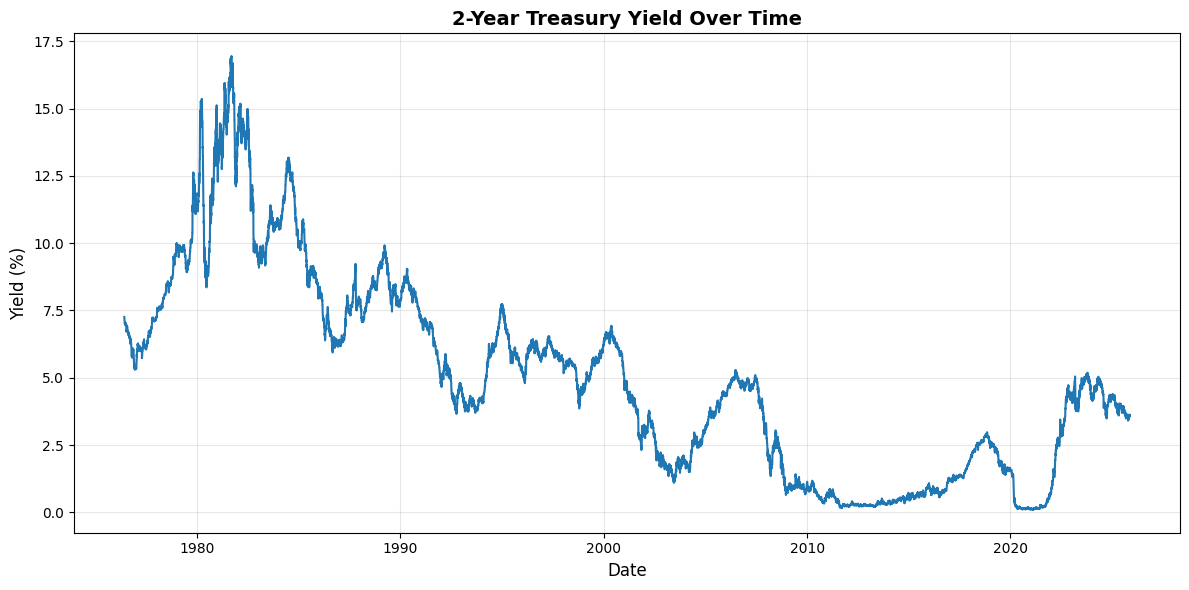

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['y_2y'], linewidth=1.5)
plt.title('2-Year Treasury Yield Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Yield (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### FedWatch Probability Over Time


In [9]:
if 'p_fed_outcome' in df.columns and df['p_fed_outcome'].notna().any():
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['p_fed_outcome'], linewidth=1.5, color='green')
    plt.title('FedWatch Probability Over Time', fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("FedWatch probability data not available. Make sure FedWatch Excel files are in data/raw/fedwatch/")


FedWatch probability data not available. Make sure FedWatch Excel files are in data/raw/fedwatch/


### 2Y Yield vs FedWatch Probability (Scatter)


In [10]:
if 'p_fed_outcome' in df.columns and df['p_fed_outcome'].notna().any():
    # Filter to rows where both variables are available
    plot_df = df[['y_2y', 'p_fed_outcome']].dropna()
    
    if len(plot_df) > 0:
        plt.figure(figsize=(10, 6))
        plt.scatter(plot_df['p_fed_outcome'], plot_df['y_2y'], alpha=0.5, s=20)
        plt.title('2Y Yield vs FedWatch Probability', fontsize=14, fontweight='bold')
        plt.xlabel('FedWatch Probability', fontsize=12)
        plt.ylabel('2Y Treasury Yield (%)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("No overlapping data points between 2Y yield and FedWatch probability")
else:
    print("FedWatch probability data not available for scatter plot")


FedWatch probability data not available for scatter plot
